In [3]:
import json
from pathlib import Path

import numpy as np
import pandas as pd
from reservoirpy.nodes import Reservoir, Ridge, ESN

In [4]:
models = Path("../../canary-decoder/canarydecoder/decoding/models/")
models = [m for m in sorted(models.glob("*")) if m.is_dir()]
models

[PosixPath('../../canary-decoder/canarydecoder/decoding/models/021220-1e'),
 PosixPath('../../canary-decoder/canarydecoder/decoding/models/021220-1e-balanced'),
 PosixPath('../../canary-decoder/canarydecoder/decoding/models/021220-8e'),
 PosixPath('../../canary-decoder/canarydecoder/decoding/models/021220-8e-balanced'),
 PosixPath('../../canary-decoder/canarydecoder/decoding/models/canary16'),
 PosixPath('../../canary-decoder/canarydecoder/decoding/models/canary16-clean-d'),
 PosixPath('../../canary-decoder/canarydecoder/decoding/models/canary16-clean-d-notrim'),
 PosixPath('../../canary-decoder/canarydecoder/decoding/models/canary16-deltas'),
 PosixPath('../../canary-decoder/canarydecoder/decoding/models/canary16-filtered'),
 PosixPath('../../canary-decoder/canarydecoder/decoding/models/canary16-filtered-notrim'),
 PosixPath('../../canary-decoder/canarydecoder/decoding/models/canarygan-1120'),
 PosixPath('../../canary-decoder/canarydecoder/decoding/models/canarygan-1120-d'),
 PosixPat

In [5]:
model_data = {
    "name": [],
    "vocab": [],
    "esn": [],
    "config": [],
    "w": [],
    "win": [],
    "wout": [],
}
for m in models:
    model_data["name"] += [m.name]
    model_data["w"] += [np.load(list(m.glob("esn-W-*"))[0])]
    model_data["win"] += [np.load(list(m.glob("esn-Win-*"))[0])]
    model_data["wout"] += [np.load(list(m.glob("esn-Wout-*"))[0])]

    if len(list(m.glob("*vocab*"))) == 0:
        print("No vocab in", m)
        model_data["vocab"] += [np.array([np.nan])]
    else:
        model_data["vocab"] += [np.load(list(m.glob("*vocab*"))[0])]

    with open(m / "config.json", "r") as fp:
        model_data["config"] += [json.load(fp)]

    with open(m / "esn.json", "r") as fp:
        model_data["esn"] += [json.load(fp)]


No vocab in ../../canary-decoder/canarydecoder/decoding/models/canary16-clean-d-notrim


In [6]:
for m, voc in zip(model_data["name"], model_data["vocab"]):
    print(m)
    print(voc)

021220-1e
['A' 'B1' 'B2' 'C' 'D' 'E' 'EARLY' 'H' 'J1' 'J2' 'L' 'M' 'N' 'O' 'OT' 'Q'
 'R' 'V' 'WN']
021220-1e-balanced
['A' 'B1' 'B2' 'C' 'D' 'E' 'EARLY' 'H' 'J1' 'J2' 'L' 'M' 'N' 'O' 'OT' 'Q'
 'R' 'V' 'WN']
021220-8e
['A' 'B1' 'B2' 'C' 'D' 'E' 'EARLY15_1' 'EARLY15_2' 'EARLY15_3' 'EARLY15_4'
 'EARLY30_1' 'EARLY30_2' 'EARLY30_3' 'EARLY30_4' 'H' 'J1' 'J2' 'L' 'M' 'N'
 'O' 'OT' 'Q' 'R' 'V' 'WN']
021220-8e-balanced
['A' 'B1' 'B2' 'C' 'D' 'E' 'EARLY15_1' 'EARLY15_2' 'EARLY15_3' 'EARLY15_4'
 'EARLY30_1' 'EARLY30_2' 'EARLY30_3' 'EARLY30_4' 'H' 'J1' 'J2' 'L' 'M' 'N'
 'O' 'OT' 'Q' 'R' 'V' 'WN']
canary16
['A' 'B1' 'B2' 'C' 'D' 'E' 'H' 'J1' 'J2' 'L' 'M' 'N' 'O' 'Q' 'R' 'V']
canary16-clean-d
['A' 'B1' 'B2' 'C' 'D' 'E' 'H' 'J1' 'J2' 'L' 'M' 'N' 'O' 'Q' 'R' 'V']
canary16-clean-d-notrim
[nan]
canary16-deltas
['A' 'B1' 'B2' 'C' 'D' 'E' 'H' 'J1' 'J2' 'L' 'M' 'N' 'O' 'Q' 'R' 'V']
canary16-filtered
['A' 'B1' 'B2' 'C' 'D' 'E' 'H' 'J1' 'J2' 'L' 'M' 'N' 'O' 'Q' 'R' 'V']
canary16-filtered-notrim
['A' 'B1' 'B2

In [7]:
complete = "canarygan-f-3e-ot-noise-notrim"
complete_model = pd.DataFrame(model_data).query("name==@complete").to_dict(orient="records")[0]
complete_model

{'name': 'canarygan-f-3e-ot-noise-notrim',
 'vocab': array(['A', 'B1', 'B2', 'C', 'D', 'E', 'EARLY15', 'EARLY30', 'EARLY45',
        'H', 'J1', 'J2', 'L', 'M', 'N', 'O', 'OT', 'Q', 'R', 'V', 'WN'],
       dtype='<U7'),
 'esn': {'cls': 'ESN',
  'cls_bin': 'cls_bin-1603185220.2309413',
  'version': '0.2.0',
  'serial': 1603185220.2309413,
  'attr': {'W': 'esn-W-1603185220.2309413.npy',
   'Win': 'esn-Win-1603185220.2309413.npy',
   'Wfb': None,
   'Wout': 'esn-Wout-1603185220.2309413.npy',
   'N': 1000,
   'lr': 0.05,
   'in_bias': True,
   'dim_inp': 41,
   'dim_out': 21,
   'typefloat': 'float64',
   'reg_model': {'type': 'ridge', 'coef': 1e-08},
   'fbfunc': None},
  'misc': {'fbfunc_info': None}},
 'config': {'preprocessing': {'sampling_rate': 16000,
   'hop_length': 512,
   'n_fft': 1024,
   'padding': 'wrap',
   'trim_below_db': 0,
   'lifter': 0},
  'inputs': {'continuous': False,
   'mfcc': False,
   'delta1': True,
   'delta2': True}},
 'w': array([[ 0.        ,  0.        ,  0.

In [8]:
vocab = complete_model["vocab"]

In [9]:
complete_model["vocab"]

array(['A', 'B1', 'B2', 'C', 'D', 'E', 'EARLY15', 'EARLY30', 'EARLY45',
       'H', 'J1', 'J2', 'L', 'M', 'N', 'O', 'OT', 'Q', 'R', 'V', 'WN'],
      dtype='<U7')

In [10]:
complete_model["config"]

{'preprocessing': {'sampling_rate': 16000,
  'hop_length': 512,
  'n_fft': 1024,
  'padding': 'wrap',
  'trim_below_db': 0,
  'lifter': 0},
 'inputs': {'continuous': False,
  'mfcc': False,
  'delta1': True,
  'delta2': True}}

In [11]:
complete_model["esn"]

{'cls': 'ESN',
 'cls_bin': 'cls_bin-1603185220.2309413',
 'version': '0.2.0',
 'serial': 1603185220.2309413,
 'attr': {'W': 'esn-W-1603185220.2309413.npy',
  'Win': 'esn-Win-1603185220.2309413.npy',
  'Wfb': None,
  'Wout': 'esn-Wout-1603185220.2309413.npy',
  'N': 1000,
  'lr': 0.05,
  'in_bias': True,
  'dim_inp': 41,
  'dim_out': 21,
  'typefloat': 'float64',
  'reg_model': {'type': 'ridge', 'coef': 1e-08},
  'fbfunc': None},
 'misc': {'fbfunc_info': None}}

In [12]:
complete_model["w"].shape

(1000, 1000)

In [13]:
complete_model["win"]

array([[ 0. ,  0. ,  0. , ..., -0. ,  0.7,  0. ],
       [ 0. , -0. ,  0. , ...,  0. , -0. , -0. ],
       [-0. , -0. , -0. , ..., -0. ,  0. ,  0. ],
       ...,
       [-0. , -0. ,  0. , ..., -0. , -0. ,  0. ],
       [-0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 1. , -0. , -1. , ...,  0. ,  0. ,  0. ]])

In [14]:
complete_model["wout"].shape

(21, 1001)

In [15]:
bias = complete_model["win"][:, :1]
win = complete_model["win"][:, 1:]
w = complete_model["w"]
wout_bias = complete_model["wout"][:, :1].T
wout = complete_model["wout"][:, 1:].T
lr = complete_model["esn"]["attr"]["lr"]
in_dim=complete_model["esn"]["attr"]["dim_inp"] - 1
out_dim=complete_model["esn"]["attr"]["dim_out"]
units=complete_model["esn"]["attr"]["N"]

In [16]:
reservoir = Reservoir(units=units, input_dim=in_dim, lr=0.05, W=w, Win=win, bias=bias).initialize()

In [17]:
readout = Ridge(Wout=wout, bias=wout_bias)
readout.set_input_dim(units)
readout.set_output_dim(out_dim)
readout.initialize()

'Ridge-0': Ridge(ridge=0.0, input_bias=True, in=1000, out=21)

In [18]:
esn = ESN(reservoir=reservoir, readout=readout, workers=-1)

In [19]:
from dataset import DecoderDataset

data_dir = Path("./data/decoder")
ckpt_dir = Path("../../data/decoder-preprocessed")
dataset = DecoderDataset.from_checkpoint(ckpt_dir)

In [20]:
train_data, train_labels = dataset.train_data
test_data, test_labels = dataset.test_data

In [21]:
real_data = []
real_labels = []
for sample, label in zip(train_data, train_labels):
    if label[0] not in ['A', 'B1', 'B2', 'C', 'D', 'E', 'H', 'J1', 'J2', 'L', 'M', 'N', 'O', 'Q', 'R', 'V']:
        continue
    else:
        real_data.append(sample)
        real_labels.append(label)

for sample, label in zip(test_data, test_labels):
    if label[0] not in ['A', 'B1', 'B2', 'C', 'D', 'E', 'H', 'J1', 'J2', 'L', 'M', 'N', 'O', 'Q', 'R', 'V']:
        continue
    else:
        real_data.append(sample)
        real_labels.append(label)

In [22]:
x_real = [np.concatenate(x[1:], axis=1) for x in real_data]

In [21]:
y_pred = esn.run(x_real)

Running ESN-0: 100%|██████████| 16000/16000 [02:07<00:00, 125.86it/s]


In [95]:
from scipy.special import softmax

y_labels = [vocab[np.argmax(softmax(np.sum(y, axis=0)))] for y in y_pred]

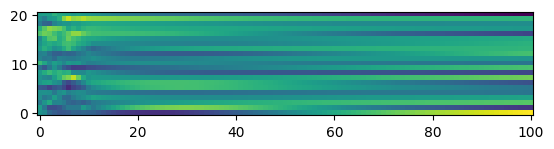

In [96]:
import matplotlib.pyplot as plt
plt.imshow(y_pred[4].T, origin="lower")

In [97]:
np.array(y_labels)

array(['N', 'A', 'B2', ..., 'O', 'Q', 'R'], dtype='<U7')

In [102]:
y_true = np.array([r[0][0] for r in real_labels])
y_true

array(['N', 'J2', 'B1', ..., 'O', 'C', 'R'], dtype='<U2')

In [99]:
v = vocab.tolist()
y_l = np.array([v.index(y) for y in y_labels])
y_t = np.array([v.index(y) for y in y_true])

In [100]:
np.sum(y_l == y_t) / len(y_t)

0.477375

In [101]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_l, y_t)

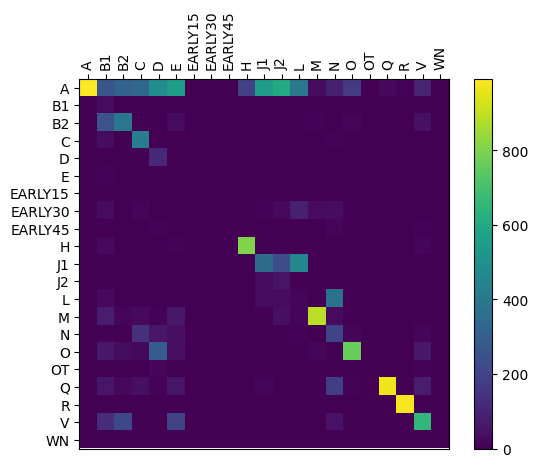

In [103]:
plt.imshow(cm)
plt.yticks(range(len(vocab)), vocab)
plt.xticks(range(len(vocab)), vocab, rotation=90)
plt.gca().xaxis.tick_top()
plt.colorbar()
plt.show()

In [1]:
import dill as pickle

with open("../../models/decoder/decoder.pkl", "rb") as fp:
    model = pickle.load(fp)

In [2]:
model

'ESN-0': ESN('Reservoir-0', 'Ridge-0')

In [23]:
y_real = model.run(x_real)

Running ESN-0: 100%|██████████| 16000/16000 [01:45<00:00, 151.98it/s]


In [35]:
x_test = [np.concatenate(x[1:], axis=1) for x in test_data]

y_pred = model.run(x_test)

Running ESN-0: 100%|██████████| 2800/2800 [00:17<00:00, 158.38it/s]


In [36]:
vocab = dataset.class_labels
vocab

['A',
 'B1',
 'B2',
 'C',
 'D',
 'E',
 'EARLY_1120',
 'EARLY_184',
 'EARLY_2255',
 'EARLY_42561',
 'EARLY_7370',
 'EARLY_7401',
 'EARLY_False',
 'H',
 'J1',
 'J2',
 'L',
 'M',
 'N',
 'O',
 'OT_57765',
 'OT_64718',
 'OT_79442',
 'OT_80795',
 'Q',
 'R',
 'V',
 'WN']

In [37]:
from scipy.special import softmax

y_labels = [vocab[np.argmax(softmax(np.sum(y, axis=0)))] for y in y_pred]

In [38]:
np.sum(y_pred, axis=1y_true = np.array([r[0][0] for r in test_labels])
y_true

array(['E', 'EARLY_42561', 'V', ..., 'EARLY_184', 'R', 'EARLY_1120'],
      dtype='<U11')

In [39]:
v = vocab
y_l = np.array([v.index(y) for y in y_labels])
y_t = np.array([v.index(y) for y in y_true])

In [40]:
np.sum(y_l == y_t) / len(y_t)

0.9864285714285714

In [41]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_l, y_t)

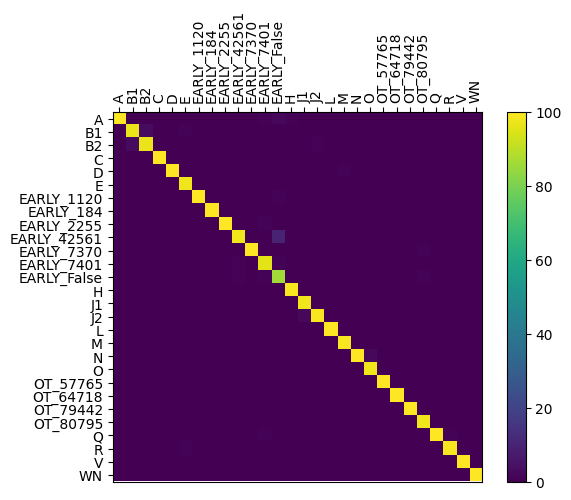

In [43]:
plt.imshow(cm)
plt.yticks(range(len(vocab)), vocab)
plt.xticks(range(len(vocab)), vocab, rotation=90)
plt.gca().xaxis.tick_top()
plt.colorbar()
plt.savefig("../../reports/decoder/confusion.png", bbox_inches="tight")
plt.show()